# Max-Cut + Ising + Simulated Annealing + 1 parámetro
Este proyecto tiene como objetivo:

> **Explorar cómo la temperatura inicial afecta la calidad de las soluciones al resolver Max-Cut mediante un solver estocástico tipo Ising.**

## Esquema del código
```mermaid
    graph LR
    A[Crear un grafo aleatorio usando el modelo Erdős-Rényi]

    style A fill: #77375dff

```

In [1]:
import math
import random
from dataclasses import dataclass
from typing import Dict, Tuple, List

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


1. Crear un grafo aleatorio usando el modelo Erdős-Rényi (G(n,p))

- `n=n`: Con n nodos
- `p=p`: Cada posible arista existe con probabilidad p
- `seed=seed`: Semilla para reproducibilidad
- `directed=False`: Grafo no dirigido (sin flechas)

In [2]:
def make_random_weighted_graph(
    n: int = 12,
    p: float = 0.3,
    seed: int = 42,
    weight_low: int = 1,
    weight_high: int = 5
) -> nx.Graph:
    rng = random.Random(seed)
    G = nx.gnp_random_graph(n=n, p=p, seed=seed, directed=False)

    for (i, j) in G.edges():
        G[i][j]["w"] = rng.randint(weight_low, weight_high)

    return G

G = make_random_weighted_graph(n=12, p=0.3, seed=1, weight_low=1, weight_high=5)
G.number_of_nodes(), G.number_of_edges()


(12, 21)

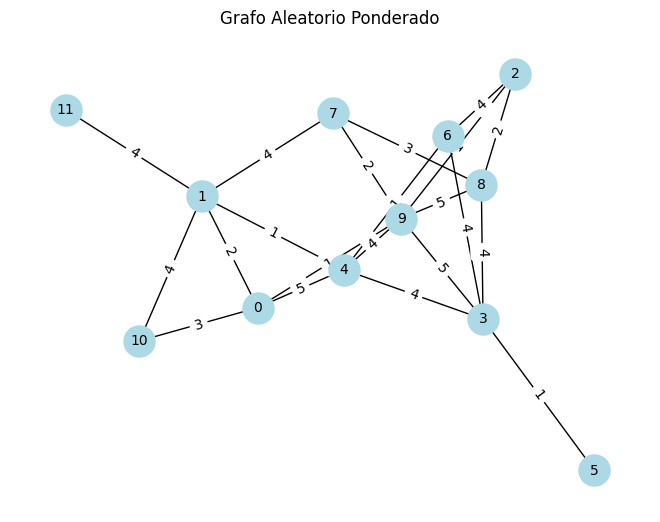

In [3]:
# Dibujar el grafo
pos = nx.spring_layout(G)  # Posiciones de los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=10)

# Agregar etiquetas de peso a las aristas
edge_labels = nx.get_edge_attributes(G, 'w')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Grafo Aleatorio Ponderado")
plt.show()